In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [27]:
diamonds = pd.read_csv('Course Materials/Data/Diamonds Prices2022.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [28]:
# feature
X = sm.add_constant(diamonds['carat'])

# y target
y = diamonds['price']

In [29]:
model = sm.OLS(y, X).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:23:37   Log-Likelihood:            -4.7276e+05
No. Observations:               53943   AIC:                         9.455e+05
Df Residuals:                   53941   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3950     13.055   -172.840      0.000   -2281.983   -2230.807
carat       7756.4362     14.066    551.423      0.000    7728.866    7784.006
==============================================================================
Omnibus:                    14027.005   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153060.389
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.036   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X.head()

,const,carat
0,1.0,0.23
1,1.0,0.21
2,1.0,0.23
3,1.0,0.29
4,1.0,0.31


In [32]:
precidao = model.predict([1,1.5])

In [33]:
new_diamonds = pd.DataFrame({'carat':[0,.1,.3,.5,1,2,3,5]})
new_diamonds

,carat
0,0.0
1,0.1
2,0.3
3,0.5
4,1.0
5,2.0
6,3.0
7,5.0


In [34]:
model.predict(sm.add_constant(new_diamonds))

0    -2256.395048
1    -1480.751432
2       70.535800
3     1621.823032
4     5500.041112
5    13256.477271
6    21012.913431
7    36525.785750
dtype: float64

In [35]:
model_LR = LinearRegression(fit_intercept=False).fit(X,y)
model_LR.coef_

array([-2256.39504754,  7756.43615951])

In [36]:
f'Função do valor do quilate em doláres: y = {model_LR.coef_[0]:.2f} + {model_LR.coef_[1]:.2f}x'

'Função do valor do quilate em doláres: y = -2256.40 + 7756.44x'

In [37]:
# y = -2256.40 + 7756.44x
resultado = model_LR.coef_[0] + (model_LR.coef_[1] * 1.5)
f'1.5 quilates tem com valor de {resultado:.2f} - com o método predição: {precidao[0]}'

'1.5 quilates tem com valor de 9378.26 - com o método predição: 9378.25919172407'

In [38]:
residuals = pd.DataFrame({
    'Carat':diamonds['carat'],
    'Price':diamonds['price'],
    'Predicted Price': model.predict(),
    'Residual': model.resid
})

residuals.head()

,Carat,Price,Predicted Price,Residual
0,0.23,326,-472.414731,798.414731
1,0.21,326,-627.543454,953.543454
2,0.23,327,-472.414731,799.414731
3,0.29,334,-7.028561,341.028561
4,0.31,335,148.100162,186.899838


<Axes: xlabel='Predicted Price', ylabel='Residual'>

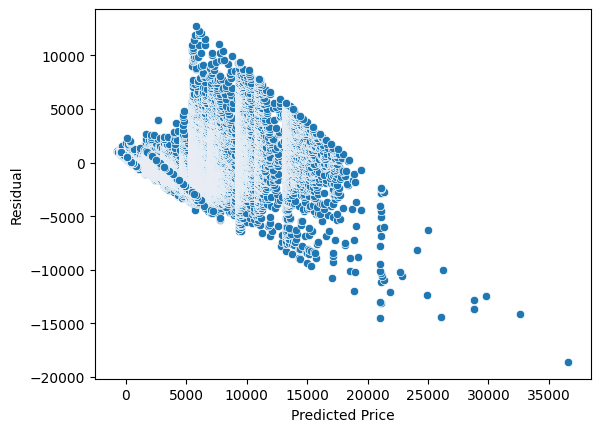

In [39]:
sns.scatterplot(residuals, x='Predicted Price', y='Residual')

In [40]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import root_mean_squared_error as rmse

In [43]:
X = sm.add_constant(diamonds['carat'])
y = diamonds['price']

model = sm.OLS(y, X).fit()

rmse_value = rmse(y, model.predict())

print(f'MAE: {mae(y, model.predict())}')
print(f'RMSE: {rmse_value}')

MAE: 1007.4339350399357
RMSE: 1548.4940983743948


In [44]:
X = sm.add_constant(diamonds[['carat','depth','table','x','y']])
y = diamonds['price']

model = sm.OLS(y, X).fit()

rmse_value = rmse(y, model.predict())

print(f'MAE: {mae(y, model.predict())}')
print(f'RMSE: {rmse_value}')

MAE: 889.2135691786066
RMSE: 1496.8311707830426
